In [20]:
# import cv2
# from matplotlib import pyplot as plt
# import numpy as np
# import tensorflow as tf
# import os

# PATH = 'train'
# IMG_SIZE = 50

# classes = {'cat': 0, 'dog': 1}

# def prepareData():
#     path = PATH
#     training_data = []
#     for img in os.listdir(path):
#         try:
#             img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#             img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#             class_num = classes[img.split('.')[0]]
#             training_data.append([img_array, class_num])
#         except Exception as e:
#             print(str(e))
#     return training_data

# training_data = prepareData()
# print(len(training_data))

25000


In [21]:
'''import pickle
file = open('train.pickle', 'wb')
pickle.dump(training_data, file)
file.close()'''

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import os
import pickle


file = open('train.pickle', 'rb')
training_data = pickle.load(file)
file.close()

In [7]:
X = []
y = []

IMG_SIZE = 50

for (features, labels) in training_data:
    X.append(features)
    y.append(labels)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X_train = X / 255.0
model = Sequential()
model.add( Conv2D(64, (3, 3), input_shape = X_train.shape[1:]) )
model.add( Activation("relu") )
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add( Conv2D(64, (3, 3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
activation_24 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_25 (Activation)   (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7744)             

In [21]:
history = model.fit(X_train, np.array(y), batch_size=32, epochs=5, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 105s 5ms/sample - loss: 0.6356 - accuracy: 0.6312 - val_loss: 0.5825 - val_accuracy: 0.6928
Epoch 2/5
22500/22500 [==============================] - 99s 4ms/sample - loss: 0.5337 - accuracy: 0.7371 - val_loss: 0.5300 - val_accuracy: 0.7408
Epoch 3/5
22500/22500 [==============================] - 105s 5ms/sample - loss: 0.4901 - accuracy: 0.7690 - val_loss: 0.4849 - val_accuracy: 0.7712
Epoch 4/5
22500/22500 [==============================] - 99s 4ms/sample - loss: 0.4557 - accuracy: 0.7863 - val_loss: 0.4731 - val_accuracy: 0.7768
Epoch 5/5
22500/22500 [==============================] - 94s 4ms/sample - loss: 0.4286 - accuracy: 0.8012 - val_loss: 0.4637 - val_accuracy: 0.7812


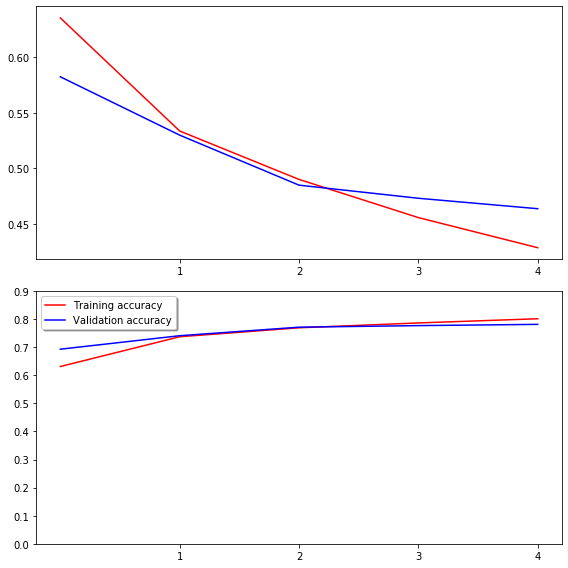

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))

ax1.plot(history.history['loss'], c='r', label='Training Loss')
ax1.plot(history.history['val_loss'], c='b', label='Validation Loss')
ax1.set_xticks(np.arange(1, 5, 1))

ax2.plot(history.history['accuracy'], color='r', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='b',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 5, 1))
ax2.set_yticks(np.arange(0, 1, 0.1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [28]:
model.save_weights('model.h5')

In [32]:
# Testing
IMG_SIZE = 50
PATH = 'test'
def prepareData():
    path = PATH
    data = []
    img_id = []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append(img_array)
            img_id.append(int(img.split('.')[0]))
        except Exception as e:
            print(str(e))
    return data, img_id

test, img_id = prepareData()
print(img_id[:5])

[11927, 347, 11165, 3002, 1043]


In [55]:
X_test = np.array(test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test / 255.0
result = model.predict(X_test)
print(result)

[[0.8804456 ]
 [0.5207825 ]
 [0.9535522 ]
 ...
 [0.9735296 ]
 [0.02727008]
 [0.4250577 ]]


In [56]:
y_pred = []
for ele in result:
    y_pred.append(int(ele >= 0.5))

In [57]:
import pandas as pd

submission = pd.DataFrame()
submission['id'] = img_id
submission['label'] = y_pred
submission.to_csv('submission.csv', index=False)